# Project: Forecasting with ETS (Exponential smoothing) 

## Smoothing in Time Series

There are several different types of smoothing methods that can be used to model time series data. We will be looking at four different types of smoothings. Two of them are covered in class notes and the other two would be a topic introduced. The four different types of smoothings that we will be looking at are:

1. Moving Average Smoothing
2. Kernel Smoothing
3. Holt-Winters Smoothing
4. Exponential Smoothing (Project Topic).

Although smoothing is not part of the Error, Trend, and Seasonality (ETS) model, it can be used as a pre-processing step before fitting the model.

Here, the smoothing will serve as a method to remove noise and outliers from the time series data and will be used to make the data more appropriate for fitting an ETS model. It is not necessary to use smoothing in order to fit an ETS model we will be still looking at the four smoothing methods and how they would help in fitting the ETS model. 
 

### 1. Moving Average Smoothing

Earlier in the semester, the professor introduced the concept of smoothing a time series when we discussed using moving average to smooth white noise. The idea behind this method is taking the average of the most recent 'k' data points, where 'k' is greater than 0. This method is useful in discovering certain traits in a time series. 

The formula for the moving average smoothing is as follows:
$M_t = \frac{1}{k} * (x_t + x_{t-1} + ... + x_{t-k+1})$. 

In this formula, k is the window size which is greater than 0, $M_t$ is the smoothed value at time $t$ and $x_t$ is the original value at time $t$. 

An example of using this formula if k = 3 is:
$M_t = \frac{1}{3} * (x_t + x_{t-1} + x_{t-2})$

The smoothed value at time $t$ will be the average of the original values at time $t$, $t-1$, and $t-2$. 

The Moving average smoothing does a good job in highlighting the El Niño effect. 

**Question**: What is the El Niño effect?

<br>

**Remark.** 
The El Niño effect is an example of seasonality in time series data and can have a significant impact on the long-term trend of the data. 
For example, if a time series data of a financial revenue of a store shows increase trend over time (due to Black friday sale, or bulk orders) the El Niño effect can cause temporary fluctuations in the data that can make it difficult to accuratley estimate the long-term trend. 
     



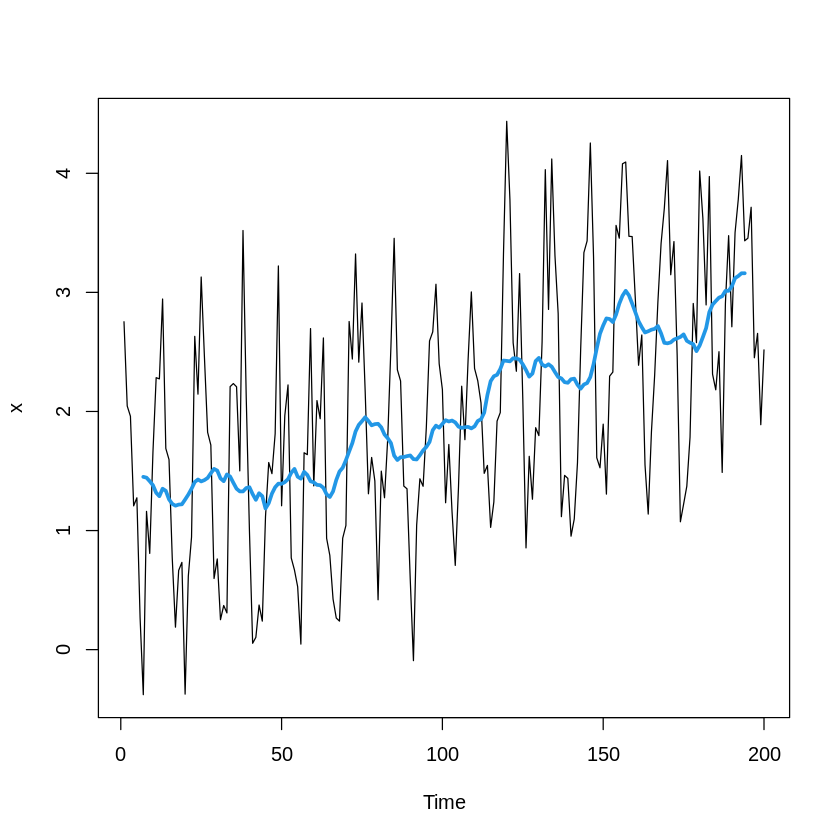

In [13]:
t=1:200
wgts = c(.5, rep(1,11), .5)/12 # weight coefficient vector
s=as.ts(sin(2*pi/12*t+1)+1) # a signal of periodicity 12
n=length(s)
x=s+0.01*(1:n)+0.5*rnorm(n) 

plot(x)
lines(filter(x, sides=2, filter=wgts), lwd=3, col=4) 

### 2. Kernel smoothing

The next smoothing method that we will look is the Kernel smoothing. Kernel smoothing is a moving average smoother that uses a weight function to average the observations. The weights to each data point in the dataset are typically determined using a kernel bandwidth. The larger this bandwidth value is, the more smoothing is applied. 

This smoothing method has several advantages over other smoothing methods in a way that this is a non-parametric method. The meaning of this "non-parametric method" is that the kernel smoother does not make any assumptions about the underlying distribution of the data. This makes the data more flexible. 

For a large dataset, the kernel smoothing can be computationally intensive which would require a careful selection of the kernel bandwidth. 

The formula for kernel bandwidth is given by:
<br>
$m_t = \sum_{i = 1}^{n} w_i(t)x_i$
<br>
In the formula, $w_i(t)$ is calculated by the following formula:
$w_i(t) = \frac{K * (\frac{t-1}{b})}{\sum^{n}_{j = 1} K * (\frac{t-j}{b})}$ 
<br>
Where K(.) is a kernel function. 



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



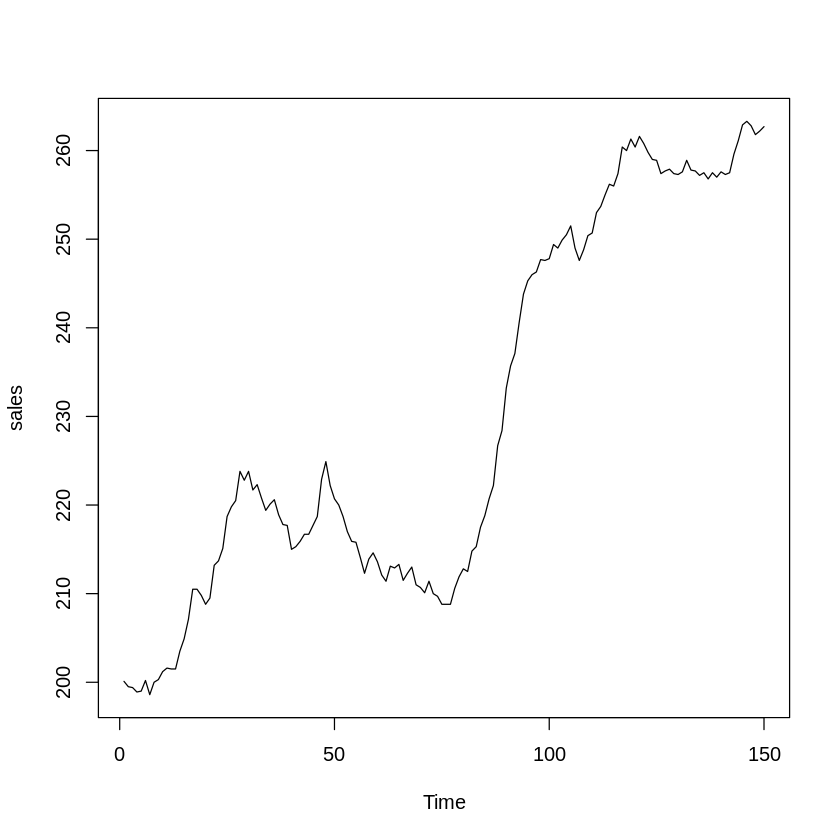

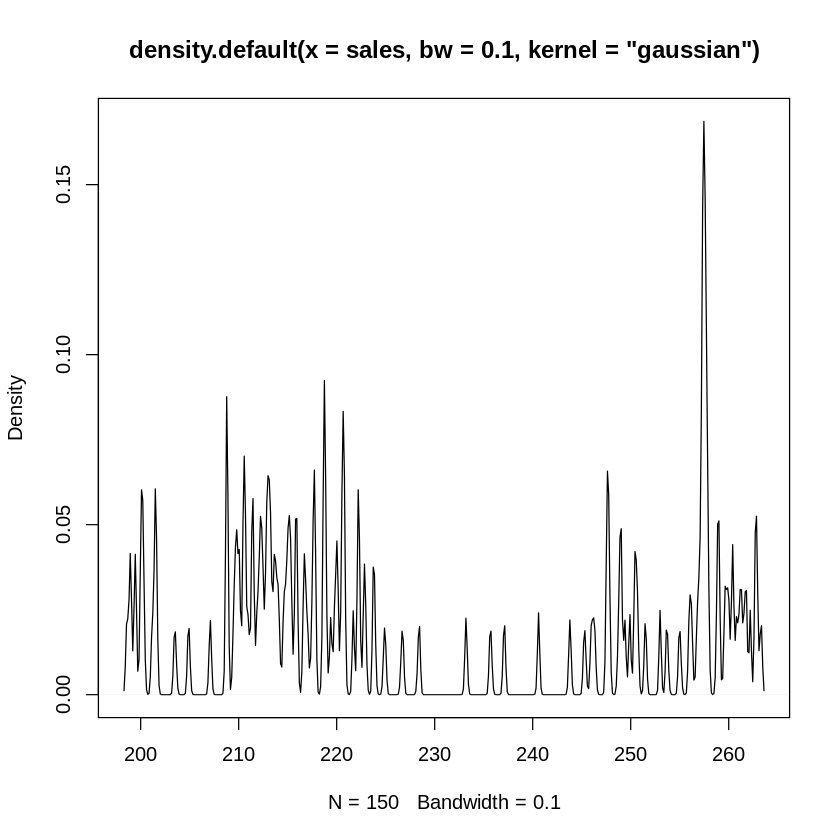

In [15]:
# Load the stats package
library(stats)
install.packages("astsa")
library(astsa)

# Compute the kernel density estimate
density <- density(sales, kernel = "gaussian", bw = 0.1)

# Plot the density estimate
plot(sales)
plot(density)


### 3. Holt-Winters Smoothing

Holt-Winters smoothing is a smoothing method used before fitting ETS model. This smoothing method smooths out data and make it more stable and predictable. It takes trends and seasonality into account as well as the average of the data. 

The basic Holt-Winters smoothing model is combination of three components. 
- Level Component:
    <br>
    This component represents the average value of the data
    <br>
    <br>
- Trend Component
    <br>
    This component represents the long-term trend in the data
    <br>
    <br>
- Seasonility component
    <br>
    This component represents the short-term fluctuations in the data that occur at regular intervals (weekly, monthly, yearly)

The smoother takes these three components into account and applies a smoothing factor to each component. This determines how much weight is given to the current value verses the pervious values. Given this factor assignments, the model can produce a smooth, stable, and predictable time series used for ETS forecasting model.

The formula for Holt-Winters Smoothing is:
<br>
$S_t = \alpha * (X_t - L_{t-1}) + (1-\alpha) * T_{t-1} + L_{t-1}$
<br>
$L_t = \beta * (S_t - L_{t-1}) + (1 - \beta) * T_{t-1}$
<br>
$T_T = \gamma * (L_t - L_{t-1}) + (1 - \gamma) * T_{t-1}$
<br>

In the formula, $S_t$ is the smoothed value, $X_t$ is the observed value at time $t$, $L_T$ is the average of the data, $T_t$ is the trend of the data and α, β, γ values are the factors discussed above. As usual, $t-1$ stands for the t previous values of the level and trend. 

This is model takes both trend and seasonality of the data. What is being introduced here is an extension of exponential smoothing model (which will only take trend into account). The details of exponential smoothing model are discussed below. 

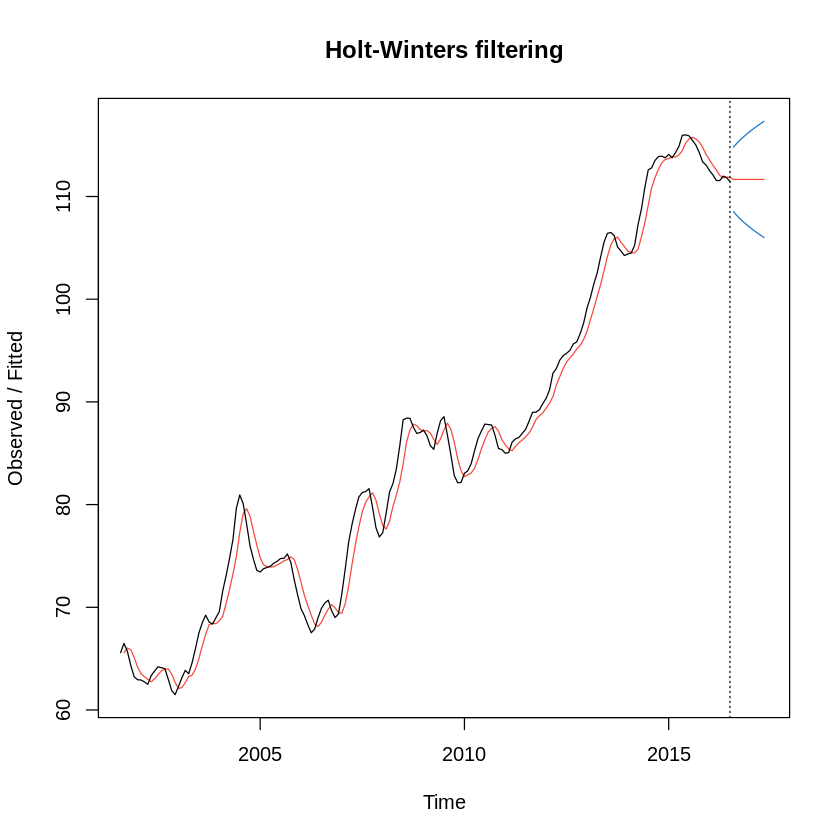

In [17]:
# Fit a Holt-Winters model with multiplicative seasonality
hw <- HoltWinters(chicken, alpha = 0.5, beta = FALSE, gamma = FALSE)

forecast <- predict(hw, n.ahead = 10, prediction.interval = TRUE)

plot(hw, forecast)
#plot(forecast)
#lines(test, col = "red")


### 4. Exponential Smoothing

The final smoothing techinque that will be looked at is the Exponential Smoothing. This is the main topic of the project and will be looked at extensively. Exponential smoothing is a technique for forecasting time series data. It is a simple but powerful method that uses weighted average of past observations to predict the future values. 
<br>
<br>
The weight is decided exponentially as the observation gets recent, thus giving more weight to recent data. As dicussed earlier, exponential smoothing takes only trend into account, whereas taking seasonality into account would mean a Holt-Winters smoothing. The formula for exponential smoothing is as follows:
<br>
<br>
$X_{t+1} = \alpha * O_t + (1 - alpha) * X_t$
<br>
<br>
In this equation $X_{t+1}$ is the updated forecast at time $t+1$, $O_t$ is the observation made at time $t$. $X_t$ is the previous forecast at time $t$. And finally, the $\alpha$ value is the smoothing parameter. This value is typically between 0 and 1 and determines the weight of each component. 

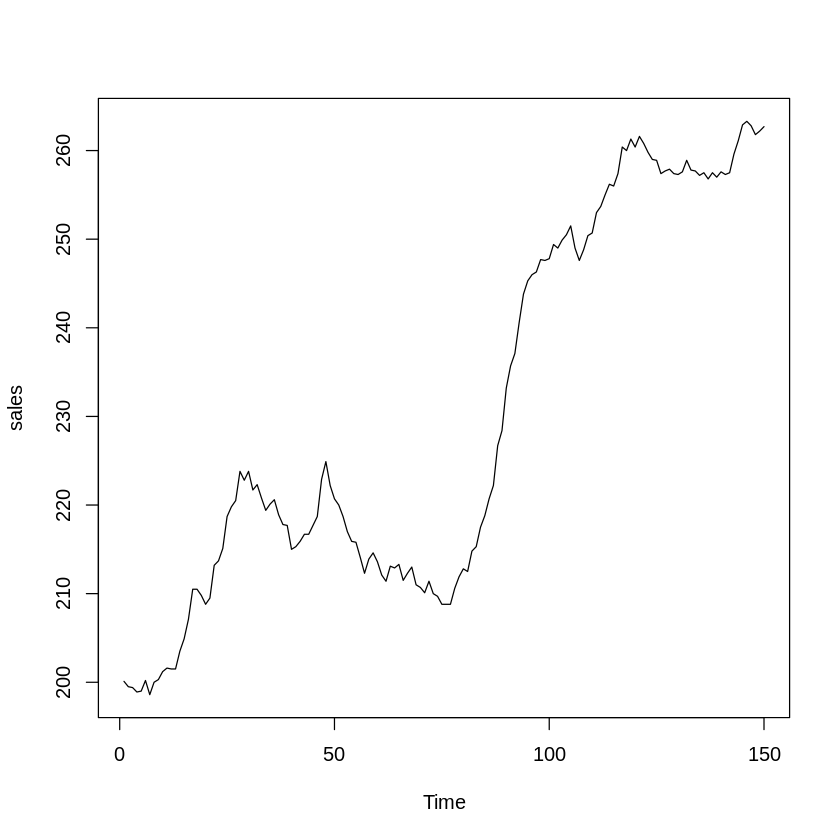

In [18]:
plot(sales)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




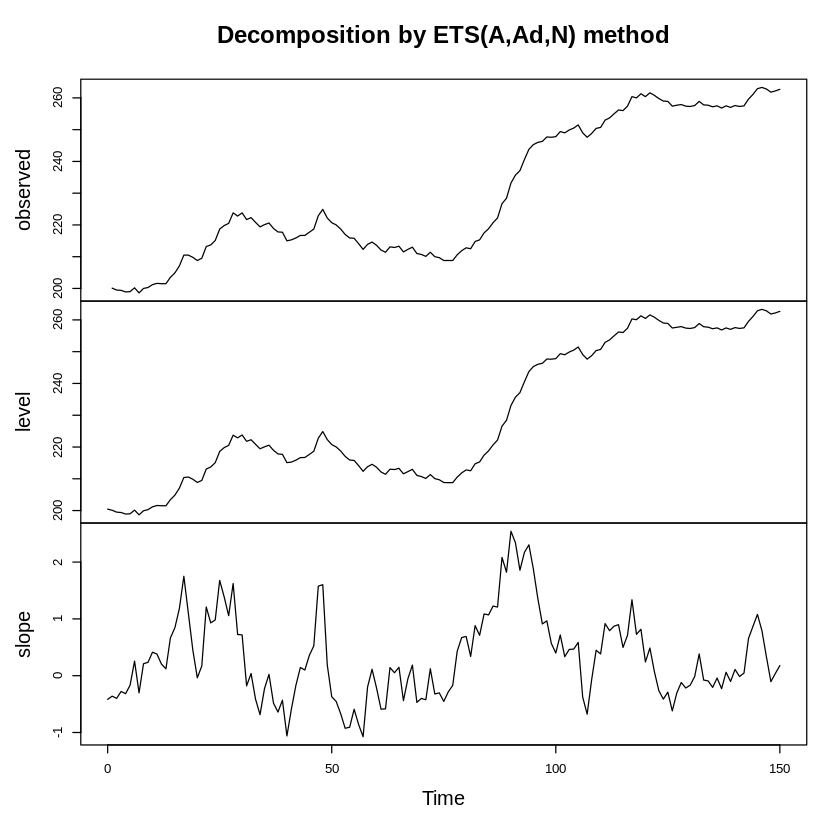

In [19]:
#install.packages("forecast")
library(forecast)

# Then, apply the ets() function to the time series data
# The function will automatically select the best model for the data and perform exponential smoothing
# The smoothed data will be stored in a new object called "ets_forecast"
ets_forecast <- ets(sales)

# You can then use the plot() function to visualize the smoothed data
plot(ets_forecast)


## Forecasting Financial Data with Exponential Smoothing

In [20]:
install.packages('gsheet')
library(gsheet)
us_cpi <- gsheet2tbl('docs.google.com/spreadsheets/d/1R7xC70CSpqOK7ph_86CgGZLTSTKJX8gLZy0U5Hg_AnI')
us_cpi <- us_cpi[1201:1296, ]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
head(us_cpi)

Yearmon,CPI
<chr>,<dbl>
01-01-2013,230.280
01-02-2013,232.166
01-03-2013,232.773
01-04-2013,232.531
01-05-2013,232.945
01-06-2013,233.504


In [22]:
#install.packages("forecast")

In [23]:
library(forecast)

In [24]:
cpi <- ts(us_cpi$CPI, start = 2013, freq = 12)
View(cpi)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,230.280,232.166,232.773,232.531,232.945,233.504,233.596,233.877,234.149,233.546,233.069,233.049
2014,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812
2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525
2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432
2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524
2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474


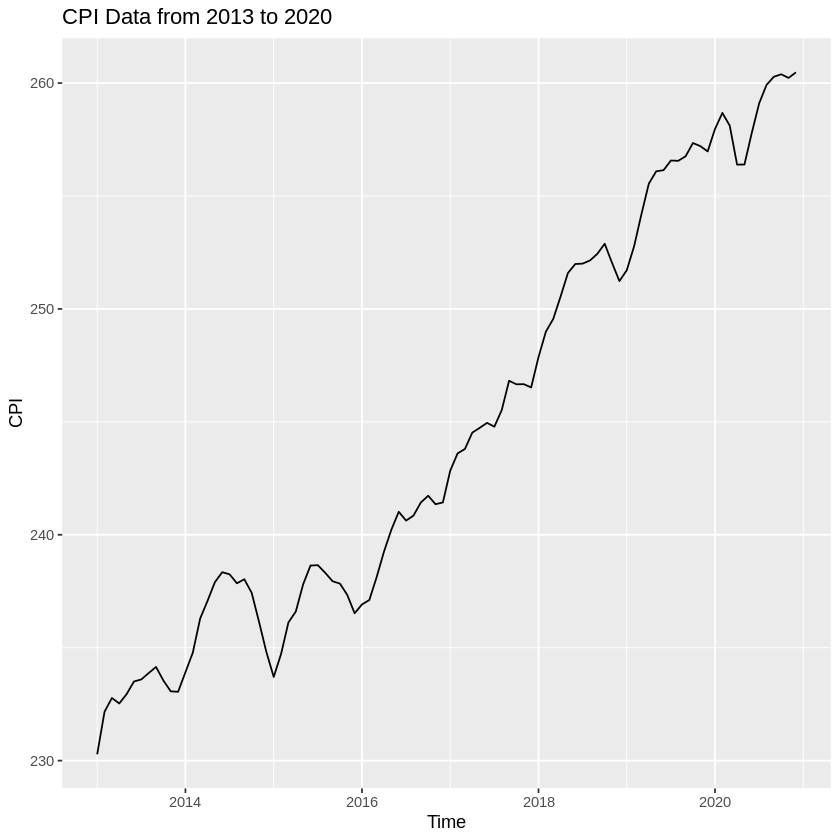

In [25]:
autoplot(cpi, main = 'CPI Data from 2013 to 2020', ylab = "CPI")

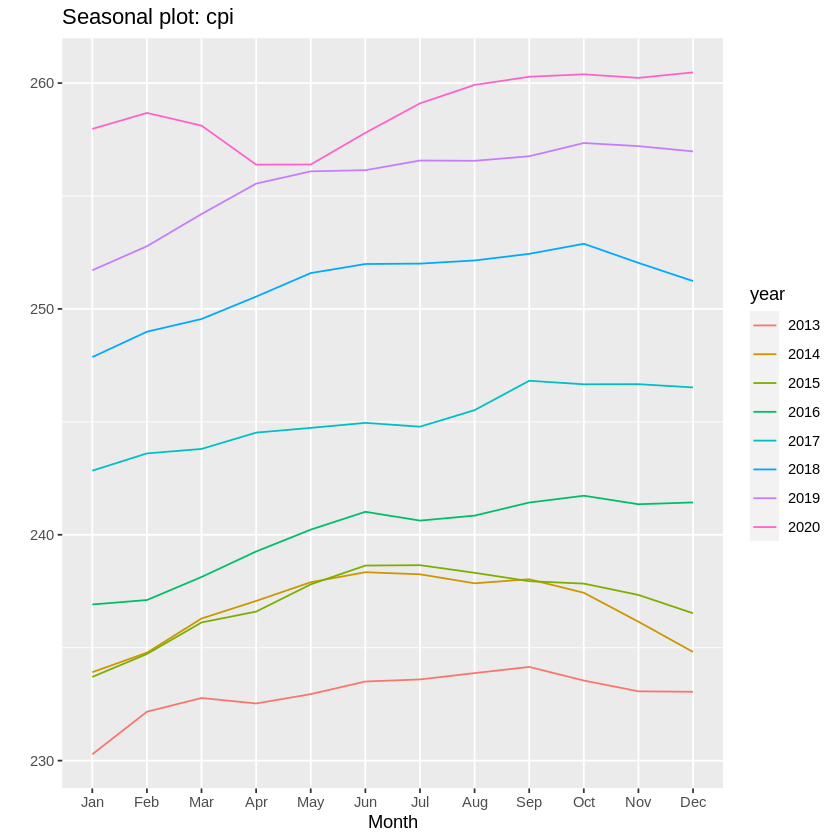

In [26]:
library(ggplot2)
ggseasonplot(cpi)

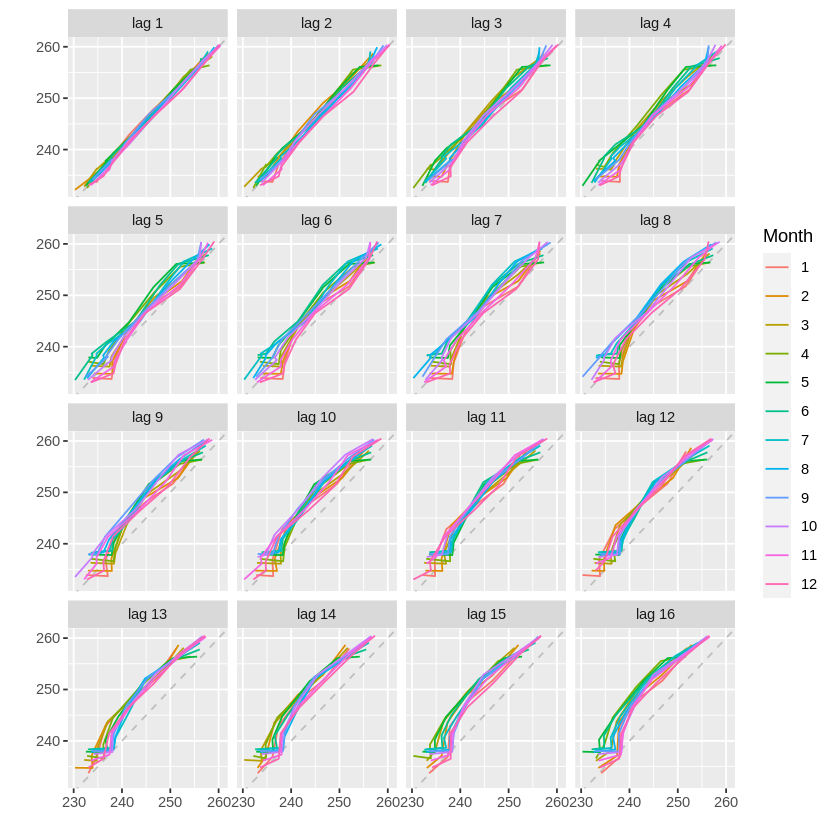

In [27]:
gglagplot(cpi)


Call:
lm(formula = cpi_log ~ time(cpi_log))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0170294 -0.0059645  0.0009866  0.0066267  0.0142385 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.607e+01  6.883e-01  -37.88   <2e-16 ***
time(cpi_log)  1.565e-02  3.412e-04   45.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007721 on 94 degrees of freedom
Multiple R-squared:  0.9572,	Adjusted R-squared:  0.9568 
F-statistic:  2104 on 1 and 94 DF,  p-value: < 2.2e-16


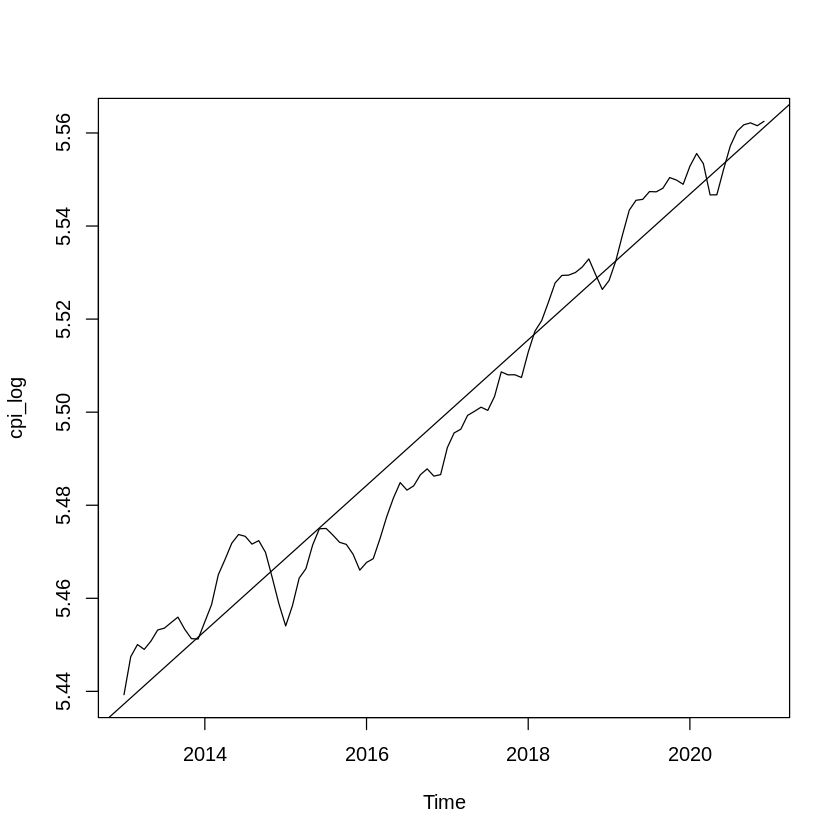

In [28]:
cpi_log <- log(cpi) #We log this to make it normal and scalable. 
summary(fit <- lm(cpi_log ~ time(cpi_log)))
plot(cpi_log)
abline(fit)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




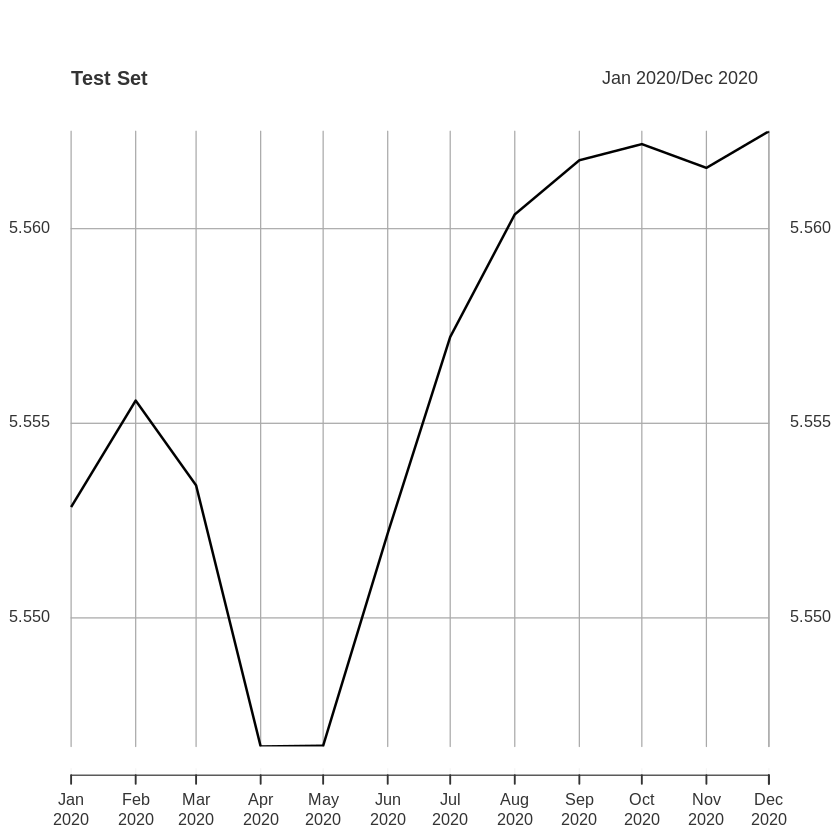

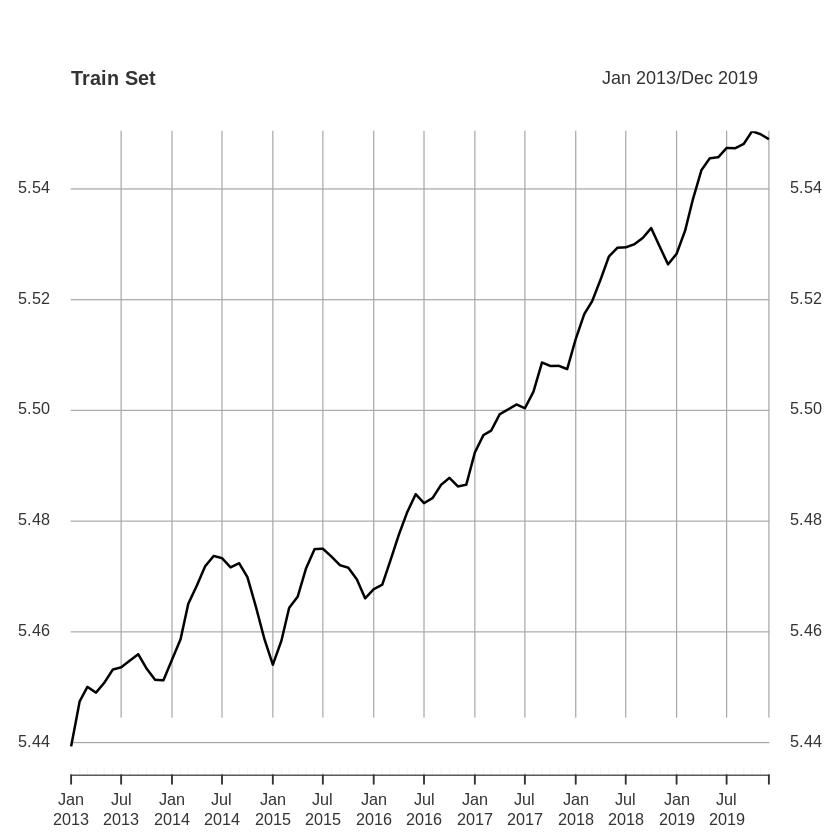

In [29]:
#install.packages("xts")
library(xts) #Use this library to split into training and testing set

cpi_log_new <- as.xts(cpi_log)
test_set <- last(cpi_log_new, '12 month')
train_set <- window(cpi_log_new, start = index(first(cpi_log_new)), end = index(last(test_set)) - 1)
plot(test_set, main = "Test Set")
plot(train_set, main = "Train Set")

In [30]:
fit_ets <- ets(train_set) #Fitting the ets model
summary(fit_ets)


ETS(M,A,A) 

Call:
 ets(y = train_set) 

  Smoothing parameters:
    alpha = 0.9997 
    beta  = 1e-04 
    gamma = 2e-04 

  Initial states:
    l = 5.4424 
    b = 0.0012 
    s = -0.0059 -0.0025 9e-04 0.0027 0.0026 0.0033
           0.0038 0.0027 0.001 -5e-04 -0.0028 -0.0052

  sigma:  4e-04

      AIC      AICc       BIC 
-643.7372 -634.4645 -602.4133 

Training set error measures:
                       ME        RMSE         MAE         MPE       MAPE
Training set 0.0001324846 0.001928405 0.001501141 0.002372752 0.02735219
                   MASE      ACF1
Training set 0.09608032 0.3300727

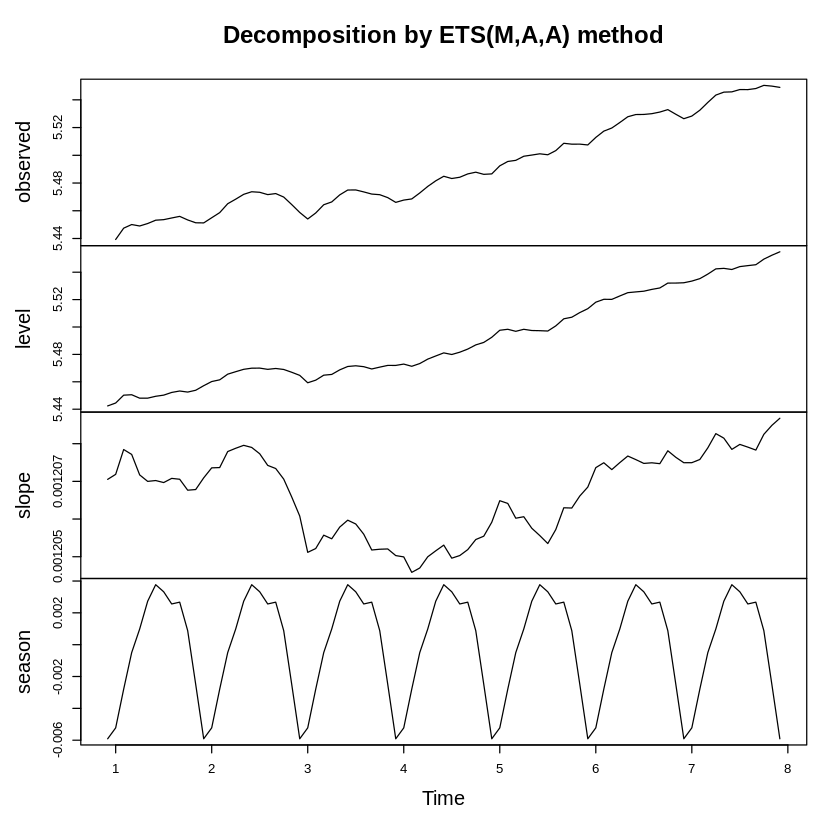

In [31]:
plot(fit_ets)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()



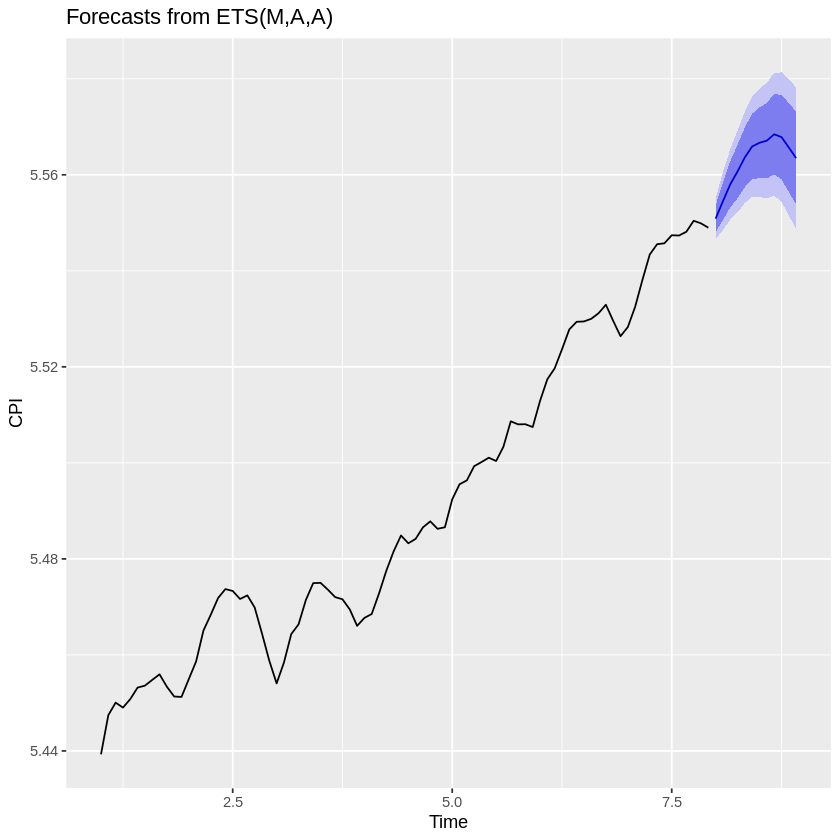

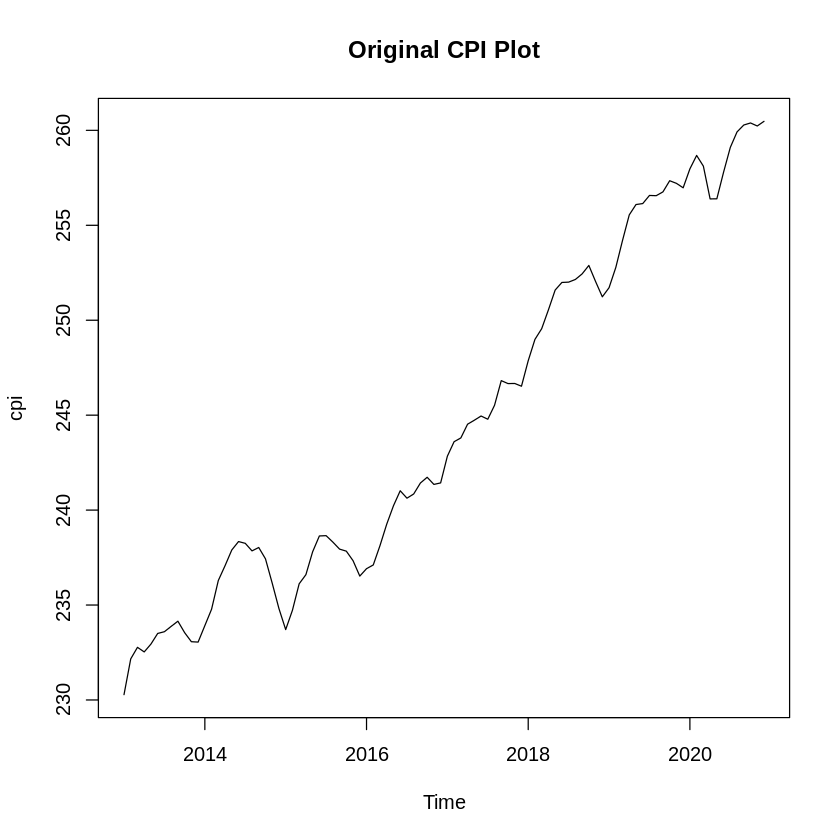

In [32]:
library(tidyverse)
fit_ets %>% forecast(h = 12) %>% autoplot() + ylab("CPI")
plot(cpi, main = "Original CPI Plot") 

In [33]:
forecast(fit_ets, h = 12)

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 8       5.550870 5.548089 5.553651 5.546617 5.555123
Feb 8       5.554509 5.550575 5.558442 5.548492 5.560525
Mar 8       5.558014 5.553195 5.562834 5.550644 5.565385
Apr 8       5.560708 5.555141 5.566275 5.552194 5.569222
May 8       5.563662 5.557436 5.569888 5.554140 5.573184
Jun 8       5.565906 5.559084 5.572729 5.555472 5.576341
Jul 8       5.566668 5.559297 5.574039 5.555395 5.577941
Aug 8       5.567114 5.559232 5.574996 5.555059 5.579168
Sep 8       5.568436 5.560074 5.576798 5.555648 5.581224
Oct 8       5.567853 5.559037 5.576669 5.554370 5.581335
Nov 8       5.565690 5.556442 5.574937 5.551547 5.579832
Dec 8       5.563479 5.553820 5.573138 5.548707 5.578251

In [34]:
accuracy(fit_ets %>% forecast(h = 12), test_set) #Checking the accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0001324846,0.001928405,0.001501141,0.002372752,0.02735219,0.09608032,0.3300727
Test set,-0.0066590807,0.008794696,0.007167887,-0.119908512,0.12906990,0.45877955,NA


In [35]:
print("A RMSE value of 0.008794696 indicates a very accurate model, because it is a very small value.")

[1] "A RMSE value of 0.008794696 indicates a very accurate model, because it is a very small value."


In [36]:
cpi_log

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,5.439296,5.447453,5.450064,5.449024,5.450802,5.453199,5.453593,5.454795,5.455958,5.453379,5.451335,5.451249
2014,5.454962,5.458653,5.465073,5.468364,5.471850,5.473711,5.473321,5.471649,5.472401,5.469885,5.464471,5.458785
2015,5.454068,5.458402,5.464336,5.466367,5.471451,5.474948,5.475015,5.473598,5.472040,5.471590,5.469477,5.466054
2016,5.467706,5.468528,5.472825,5.477555,5.481593,5.484872,5.483252,5.484170,5.486571,5.487817,5.486261,5.486588
2017,5.492399,5.495540,5.496352,5.499313,5.500168,5.501075,5.500384,5.503374,5.508655,5.508023,5.508047,5.507459
2018,5.512892,5.517417,5.519675,5.523643,5.527793,5.529385,5.529453,5.530008,5.531170,5.532935,5.529580,5.526381
2019,5.528286,5.532504,5.538129,5.543410,5.545537,5.545736,5.547405,5.547355,5.548138,5.550421,5.549885,5.548975
2020,5.552847,5.555584,5.553405,5.546696,5.546715,5.552172,5.557218,5.560366,5.561758,5.562173,5.561562,5.562503


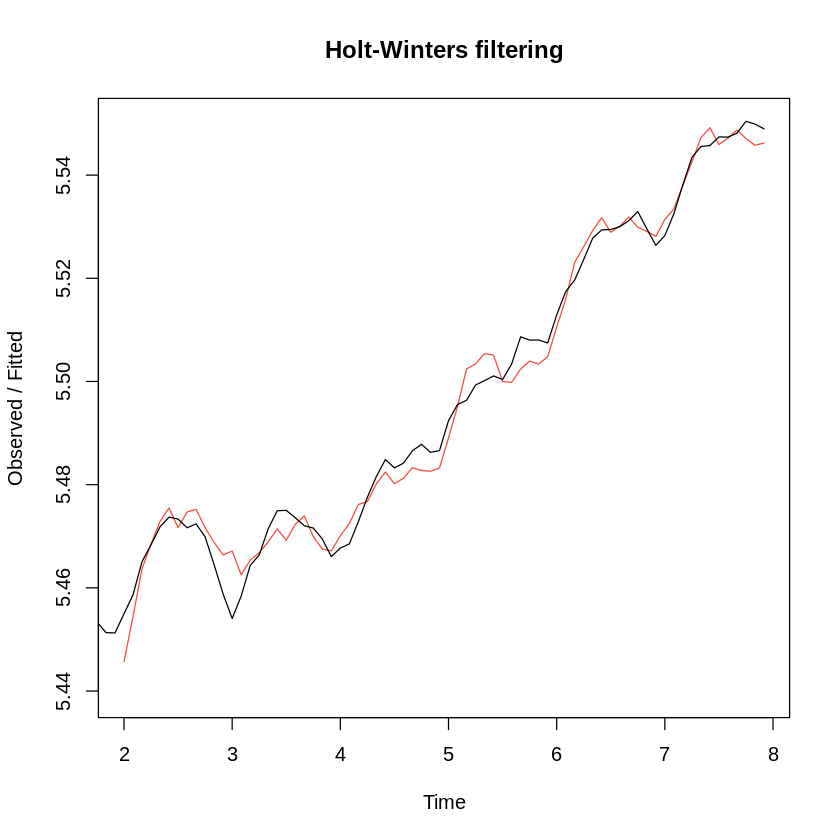

In [38]:
fit_hw <- HoltWinters(train_set, alpha = 0.5, beta = 0.1, gamma = 0.3) #Comparing with Holt-Winters Smoother
plot(fit_hw)

In [39]:
predicted <- forecast(fit_hw, h = 12)
accuracy(predicted, test_set) #This accuracy is less than the accuaracy we found in Exponential Smoothing

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0001389357,0.003538428,0.002789663,0.002492375,0.05080835,0.1785520,0.6527925
Test set,-0.0125309953,0.014519185,0.012723141,-0.225577155,0.22903747,0.8143428,NA


## References

- https://en.wikipedia.org/wiki/Kernel_smoother
- https://orangematter.solarwinds.com/2019/12/15/holt-winters-forecasting-simplified/
- https://medium.com/analytics-vidhya/a-thorough-introduction-to-holt-winters-forecasting-c21810b8c0e6
- https://docs.rapidminer.com/9.4/studio/operators/modeling/time_series/forecasting/holt-winters_trainer.html
- https://otexts.com/fpp3/expsmooth.html
- https://www.kaggle.com/datasets/varpit94/us-inflation-data-updated-till-may-2021
- https://www.datacamp.com/cheat-sheet/xts-cheat-sheet-time-series-in-r
- https://cran.r-project.org/web/packages/xts/vignettes/xts-faq.pdf

Lectures referred:
- 2.3
- 2.4